In [1]:
import numpy as np
import networkx as nx
import torch
from torch import optim

from tqdm import tqdm
import matplotlib.pyplot as plt

from vbsbm import VBSBM

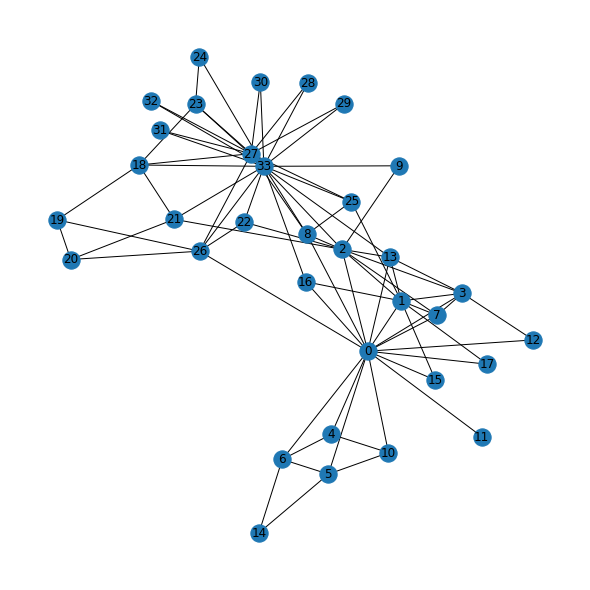

In [2]:
G_karate = nx.read_edgelist('ucidata-zachary/out.ucidata-zachary', comments='%', nodetype=int)
G_karate = nx.convert_node_labels_to_integers(G_karate)
A_karate = torch.from_numpy(nx.to_numpy_array(G_karate))

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G_karate, seed=1234)
nx.draw(G_karate, with_labels=True, pos=pos)

10000it [00:26, 372.87it/s, elbo=343, kl=18.4]


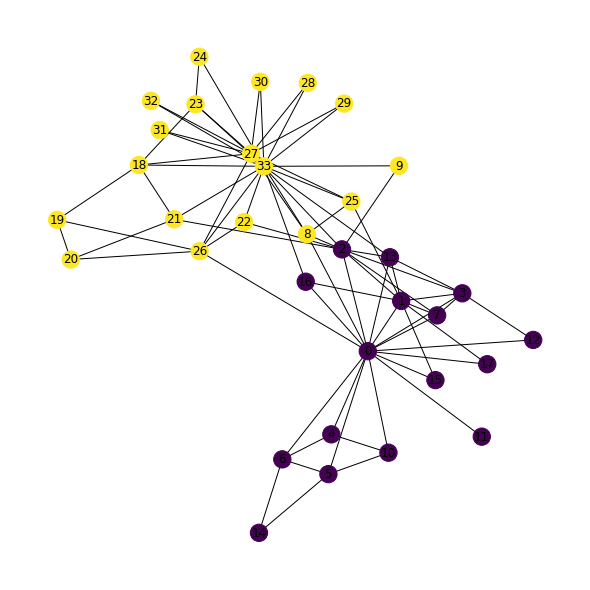

In [3]:
K = 2
# Set our priors
c = torch.zeros(A_karate.shape[0], K)
mu = torch.eye(K)
sigma = torch.tensor(0.1)

model = VBSBM(c, mu, sigma, use_vi=True, use_degree_correction=True)

#model.cuda()
#A_karate = A_karate.cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-2)
pb = tqdm()
for i in range(10000):
    optimizer.zero_grad()
    elbo = -model(A_karate)
    elbo.backward()
    optimizer.step()
    pb.set_postfix({'elbo': elbo.item(), 'kl': model.kl().item()})
    pb.update(1)
pb.close()

colors = (np.linspace(0, 1, K) * 20 + 10)
c = torch.argmax(model.c, dim=1).numpy()

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G_karate, seed=1234)
nx.draw(G_karate, with_labels=True, node_color=np.array([colors[block] for block in c]), pos=pos)

10000it [00:25, 392.04it/s, elbo=364, kl=18.9]


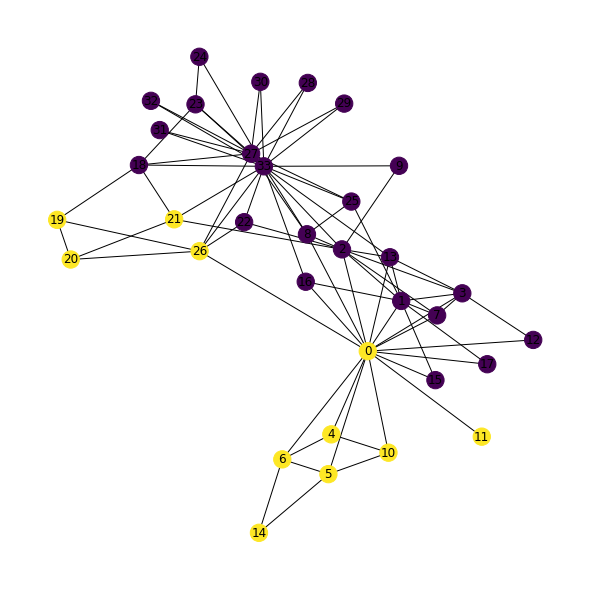

In [4]:
K = 2
# Set our priors
c = torch.zeros(A_karate.shape[0], K)
# suppose we want to strongly bias node 2, 8 and 13 to be in the same block with our prior
# what happens then?
c[(2, 8, 13),0] = 100 
mu = torch.eye(K) * torch.mean(A_karate)
sigma = torch.tensor(0.1)

model = VBSBM(c, mu, sigma, use_vi=True, use_degree_correction=True)

#model.cuda()
#A_karate = A_karate.cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-2)
pb = tqdm()
for i in range(10000):
    optimizer.zero_grad()
    elbo = -model(A_karate)
    elbo.backward()
    optimizer.step()
    pb.set_postfix({'elbo': elbo.item(), 'kl': model.kl().item()})
    pb.update(1)
pb.close()

colors = (np.linspace(0, 1, K) * 20 + 10)
c = torch.argmax(model.c, dim=1).numpy()

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G_karate, seed=1234)
nx.draw(G_karate, with_labels=True, node_color=np.array([colors[block] for block in c]), pos=pos)

10000it [00:26, 384.00it/s, elbo=354, kl=18]   


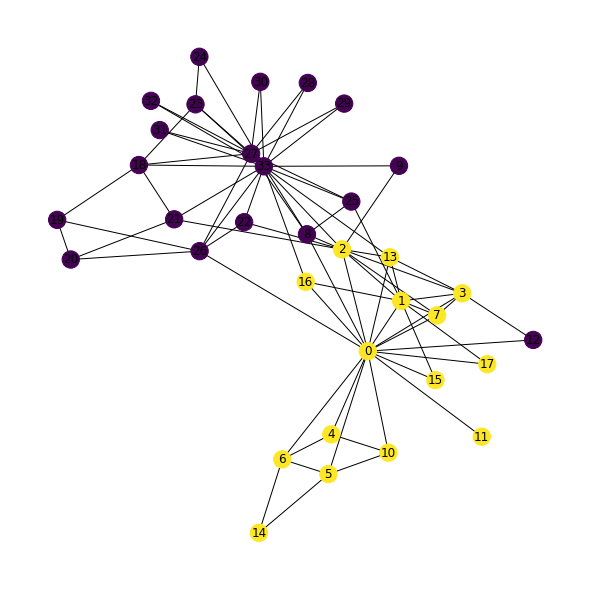

In [6]:
K = 2
# Set our priors
c = torch.zeros(A_karate.shape[0], K)
# suppose we want to strongly bias node 9, 12 and 26 to be in the same block with our prior
# what happens then?
c[(9, 12, 26),0] = 100
mu = torch.eye(K) * torch.mean(A_karate)
sigma = torch.tensor(0.1)

model = VBSBM(c, mu, sigma, use_vi=True, use_degree_correction=True)

#model.cuda()
#A_karate = A_karate.cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-2)
pb = tqdm()
for i in range(10000):
    optimizer.zero_grad()
    elbo = -model(A_karate)
    elbo.backward()
    optimizer.step()
    pb.set_postfix({'elbo': elbo.item(), 'kl': model.kl().item()})
    pb.update(1)
pb.close()

colors = (np.linspace(0, 1, K) * 20 + 10)
c = torch.argmax(model.c, dim=1).numpy()

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G_karate, seed=1234)
nx.draw(G_karate, with_labels=True, node_color=np.array([colors[block] for block in c]), pos=pos)